In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from algorithms import *
from benchmark import *

# Definition of variables
benchmarkfunction_list = [StybliskiTang, Rastrigin, Rosenbrock, Beale, Sphere, Perm, GoldsteinPrice, Ackley, Bohachevsky] #Hartmann
algorithms_list        = [bayesian_optimization, bfgs, latin_hypercube, nelder_mead, particle_swarm, response_surface, sobol]

### The benchmark functions

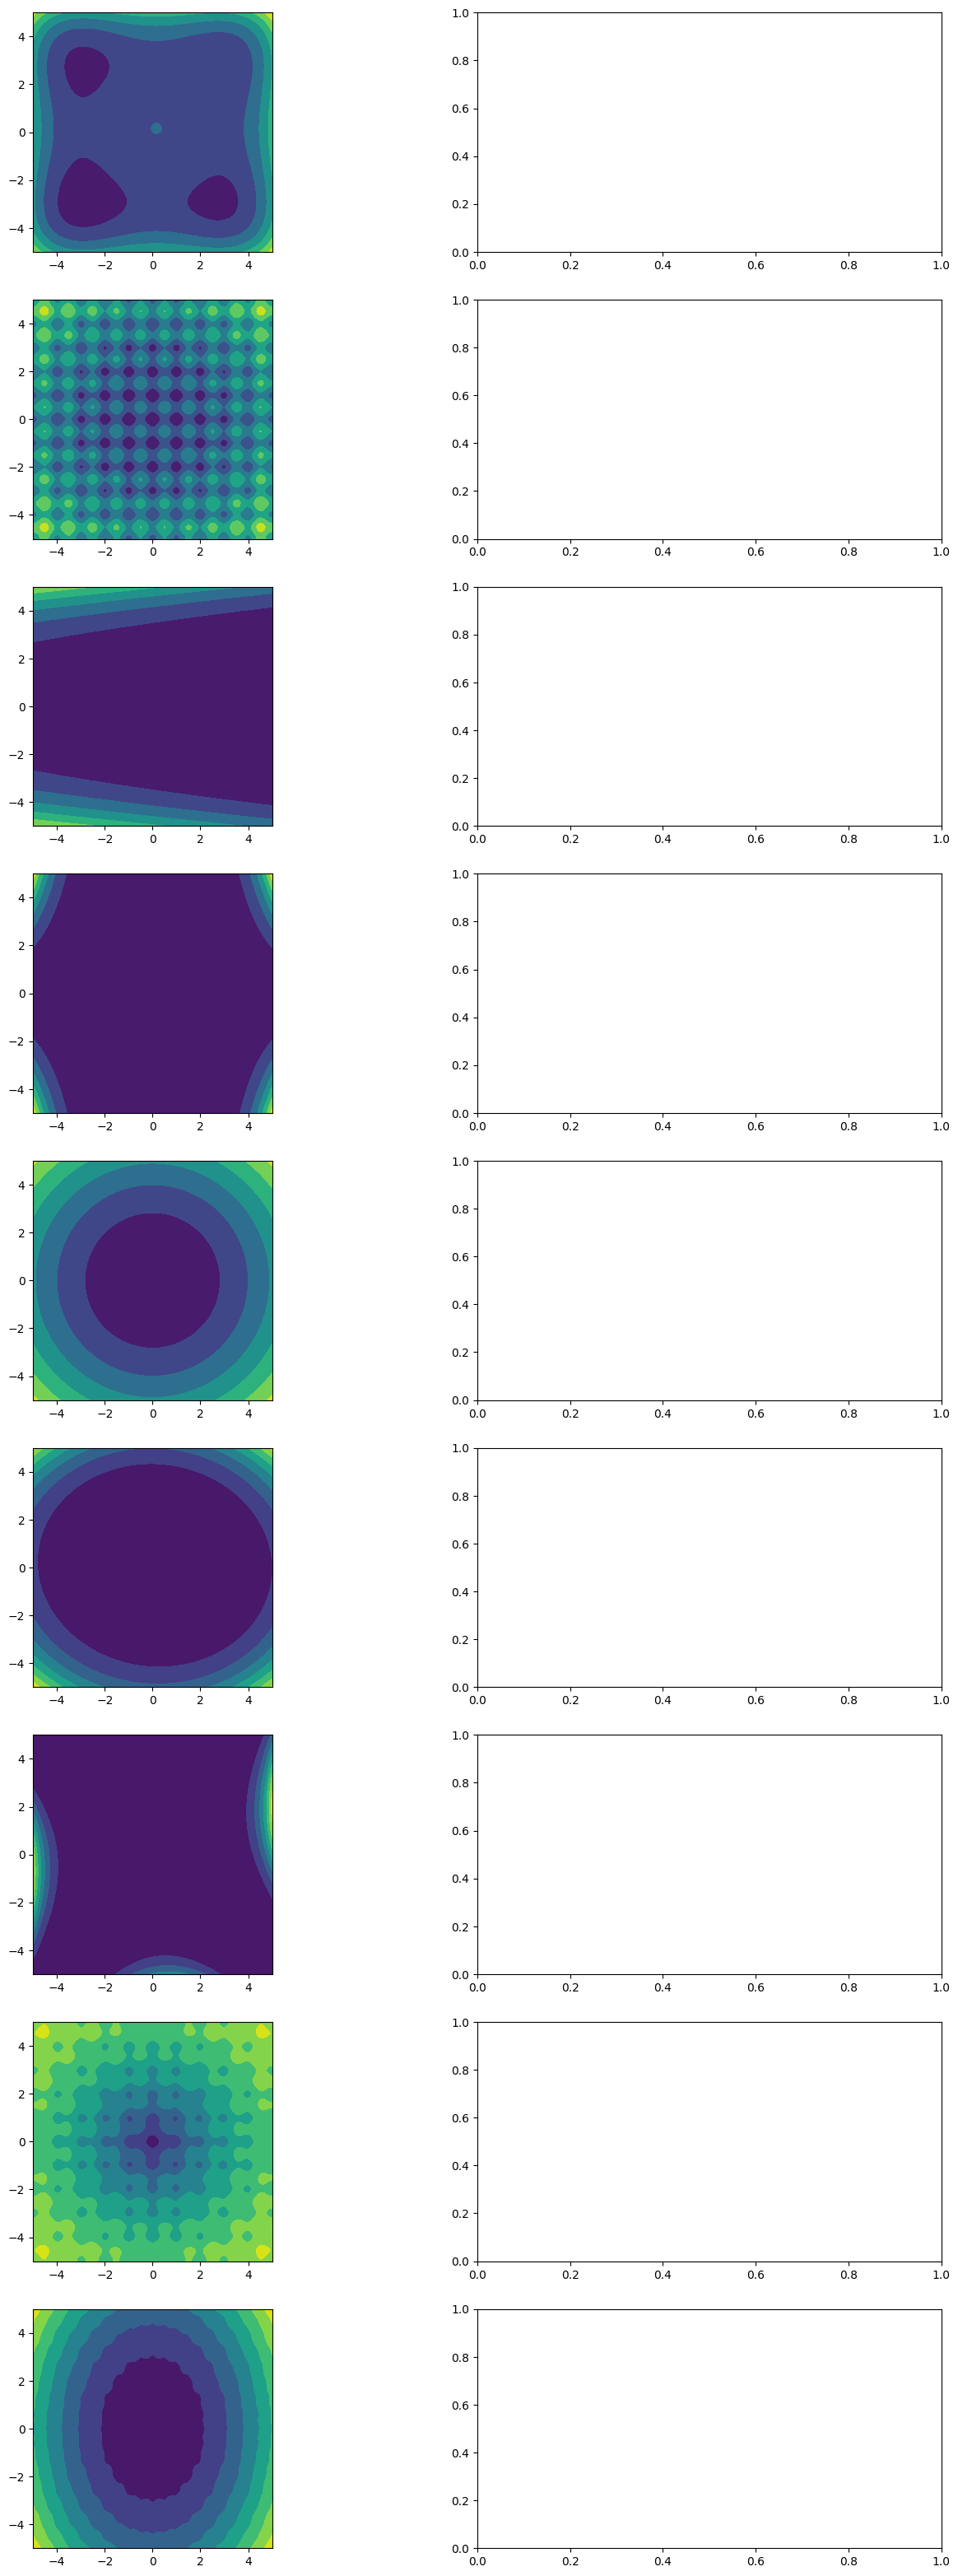

In [2]:
# Define the X1 and X2 span
X1 = np.linspace(-5, 5, 101)
X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2]).T

fig, ax = plt.subplots(len(benchmarkfunction_list), 2, figsize=(16,40))

for idx, fun in enumerate(benchmarkfunction_list):
    # Compute the function
    Fx = fun(points).reshape(101,101)

    ax[idx,0].contourf(X1,X2,Fx)
    ax[idx,0].axis('scaled')

plt.show()

### Algorithms on test_function

In [3]:
# # Define the X1 and X2 span
# X1 = np.linspace(-5, 5, 101)
# X2 = np.linspace(-5, 5, 101)
# points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

# # Define the parameters for the algorithms
# budget    = 100
# n_samples = 15
# dimension = 2

# # Define the intial set of points
# initial_x =  np.random.uniform(low=-5, high=5, size=[dimension, n_samples])



# fig, ax = plt.subplots(len(algorithms_list), 2*len(benchmarkfunction_list), figsize=(100,50))

# plot_idx = 0

# for test_function in benchmarkfunction_list:

#     # Compute the function
#     Fx = test_function(points.T)

#     # Find minimum and its coordinates
#     idx  = np.argmin(Fx)
#     Xmin = points[idx]
#     print(f"[MIN function] Minimum in x={Xmin[0]},    y={Xmin[1]}    with f={Fx[idx]}")

#     Fx = Fx.reshape(101,101)

#     for idx, fun in enumerate(algorithms_list):

#         if   (idx == 0): # Bayesian Optmization
#             X_best, Y_best, X, Y = fun(test_function, X=initial_x, dimension=dimension, n_samples=n_samples, sampling_budget=budget, low=-5, high=5)
#             #print(f"X_best: {X_best},    Y_best: {Y_best}")
            
#         elif (idx == 1): # BFGS
#             X_best, Y_best, X, Y = fun(test_function, x0=initial_x[:,0], x1=initial_x[:,1], sampling_budget=budget, tol=10e-6)
#             #print(f"X_best: {X_best},    Y_best: {Y_best}")
#             pass
#         elif (idx == 2): # Latin Hypercube
#             X_best, Y_best, X, Y = fun(test_function, n_samples=budget , dimension=dimension, lower_bounds= [-5, -5], upper_bounds=[5, 5])
#             #print(f"X_best: {X_best},    Y_best: {Y_best}")

#         elif (idx == 3): # Nelder Mead
#             X_best, Y_best, X, Y = fun(test_function, x0 = initial_x[:,0], low=-5, high=5, step=0.1, no_improve_thr=10e-6, no_improv_break=10, sampling_budget=budget, alpha=1., gamma=2., rho=-0.5, sigma=0.5)
#             #print(f"X_best: {X_best},    Y_best: {Y_best}")

#         elif (idx == 4): # Particle Swarm
#             X_best, Y_best, X, Y = fun(test_function, X=initial_x, V=None, dimension=dimension, low=-5, high=5, sampling_budget=budget, n_particles=n_samples, tol=10e-6, c1=0.1, c2=0.1, w=0.8)
#             #print(f"X_best: {X_best},    Y_best: {Y_best}")

#         elif (idx == 5): # Response Surface Modeling
#             X_best, Y_best, X, Y = fun(test_function, x0=initial_x[:,0], sampling_budget=budget, tol = 1e-8, sampling_method="box_behnken", sampling_bound=0.5, iteration_method="gradient", learning_rate=0.01)
#             #print(f"X_best: {X_best},    Y_best: {Y_best}")
#             pass
#         elif (idx == 6): # Sobol
#             X_best, Y_best, X, Y = fun(test_function, n_samples=budget , dimension=dimension, lower_bounds= [-5, -5], upper_bounds=[5, 5])
#             #print(f"X_best: {X_best},    Y_best: {Y_best}")


#         ax[idx, plot_idx].contourf(X1,X2,Fx)
#         ax[idx, plot_idx].axis('scaled')
#         ax[idx, plot_idx].scatter(X[:,0], X[:,1], c="red",  s=1)        # The points
#         ax[idx, plot_idx].scatter(X[0,0], X[0,1], c="blue", s=3)        # Inital point in the log
#         ax[idx, plot_idx].scatter(Xmin[0], Xmin[1], c="white",s=3)      # Real minimum
#         ax[idx, plot_idx].scatter(X_best[0], X_best[1],c="orange",s=3)  # Estimated minimum

#         ax[idx, plot_idx + 1].plot(np.arange(0,len(Y)), Y)
#         ax[idx, plot_idx + 1].set_title("Performances over time")

#     plot_idx += 2

# plt.show()

### Bayesian Optimization performances

|Index|Function            |Tests     |Error Mean               |Error std                |
-------------------------------------------------------------------------------------
|1    |StybliskiTang       |250       |0.01997002529717573      |0.0014166777233145112    |
|2    |Rastrigin           |250       |-0.0033249164796167797   |0.0029773975169875644    |
|3    |Rosenbrock          |250       |0.003157172192512305     |0.0007848401216930432    |
|4    |Beale               |250       |0.004316490078321569     |0.0007177745700565067    |
|5    |Sphere              |250       |0.0003917571466605746    |0.001042183434397186     |
|6    |Perm                |250       |0.003893154470114876     |0.0008152579657970735    |
|7    |GoldsteinPrice      |250       |0.0009733201042768844    |0.0007518247426598913    |
|8    |Ackley              |250       |-0.005150613681289905    |0.005949988395810245     |
|9    |Bohachevsky         |250       |0.0009501070537694157    |0.0010518385907756958

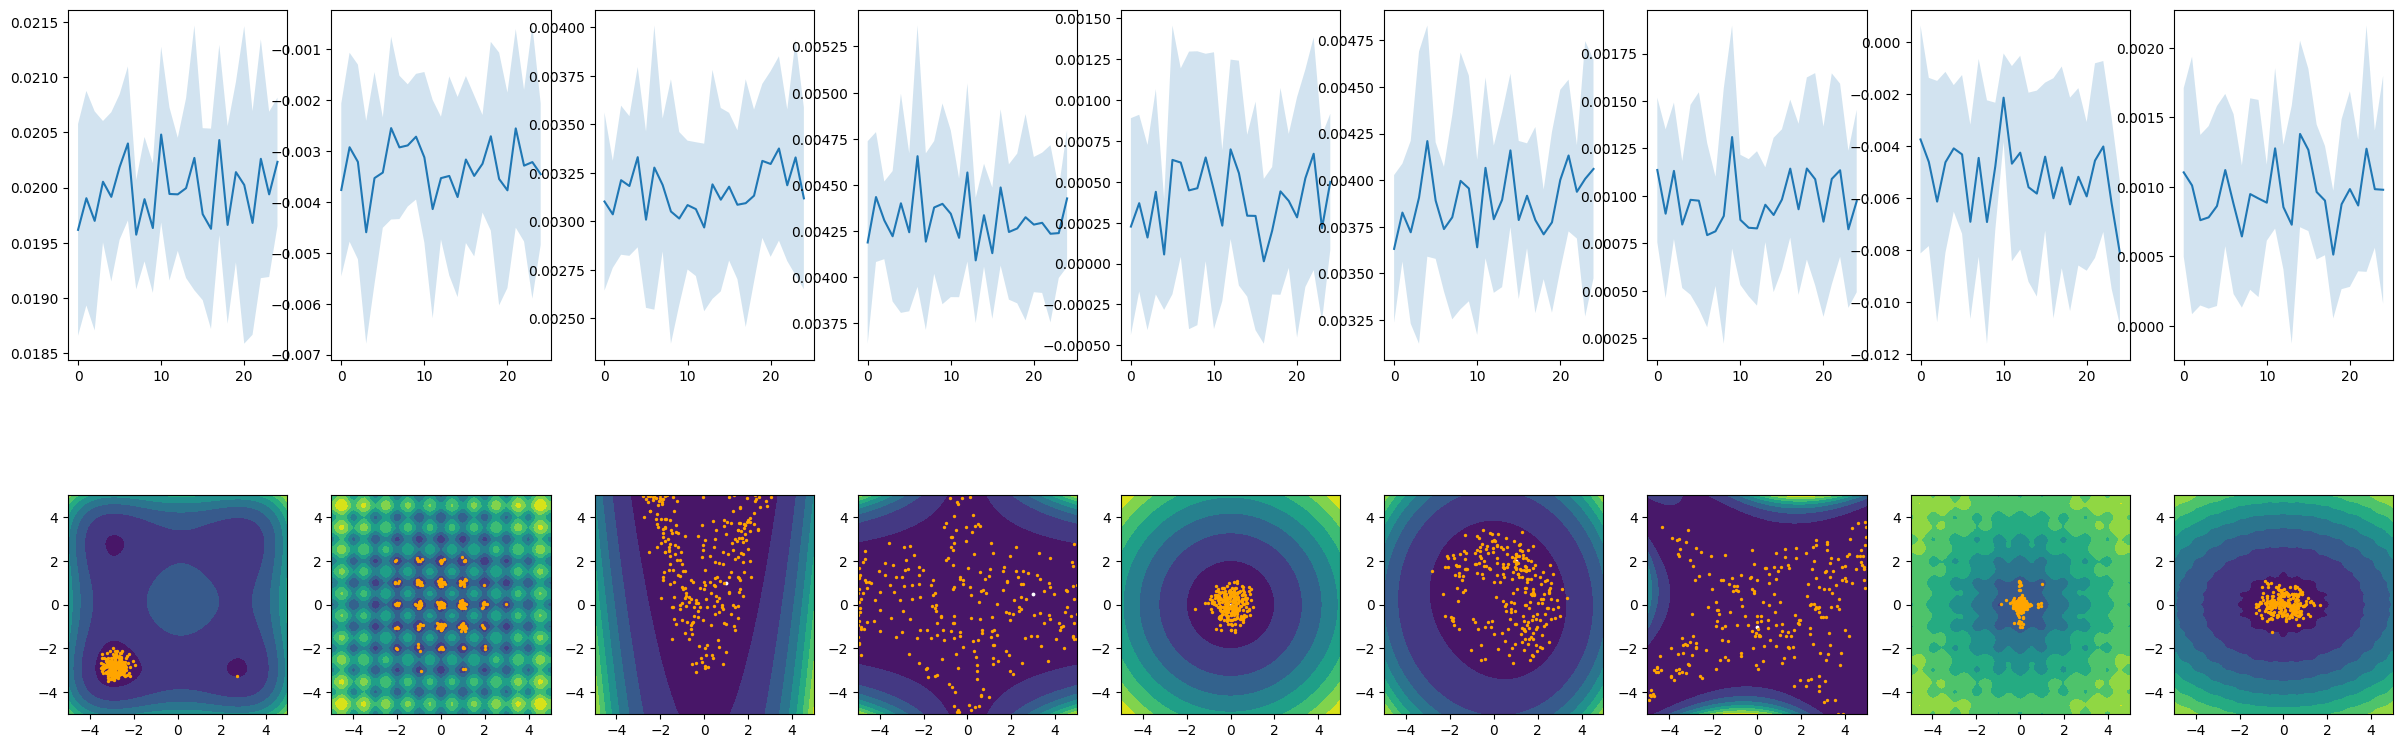

In [4]:
# Define the X1 and X2 span
X1 = X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

# Define the parameters for the algorithms
budget    = 100
n_samples = 15
dimension = 2
new_max = 0.28
new_min = 0.22

test_rounds = 25
batch_size = 10
fig, ax = plt.subplots(2,  len(benchmarkfunction_list), figsize=(30,10))

data = [["Index","Function", "Tests", "Error Mean", "Error std"]]

for plt_idx, test_function in enumerate(benchmarkfunction_list):
    # Compute the function
    Fx = test_function(points.T)

    # Find minimum and its coordinates
    idx  = np.argmin(Fx)
    Xmin = points[idx]
    Fmin = Fx[idx]
    Fmax = np.max(Fx)
    test_function_scaled = lambda x: (new_max - new_min)*(test_function(x) - Fmin)/(Fmax - Fmin) + new_min + np.random.normal(0, 0.001)
    Fx_scaled = test_function_scaled(points.T)
    Fmin = Fx_scaled[idx]
    ax[1, plt_idx].contourf(X1,X2,Fx_scaled.reshape(101,101).T)
    ax[1, plt_idx].axis('scaled')
    ax[1, plt_idx].scatter(Xmin[0], Xmin[1], c="white",s=3)      # Real minimum

    
    test_mean, test_std = [], []
    for _ in range(test_rounds):
        batch = []
        for _ in range(batch_size):
            # Define the intial set of points
            initial_x =  np.random.uniform(low=-5, high=5, size=[dimension, n_samples])
            
            # Estimate the minimum
            X_best, Y_best, _, _ = bayesian_optimization(test_function_scaled, X=initial_x, dimension=dimension, n_samples=n_samples, sampling_budget=budget, low=-5, high=5)
            batch.append(Y_best)
            ax[1, plt_idx].scatter(X_best[0], X_best[1], c="orange",s=2) 
        
        batch_mean = np.mean(Fmin - batch)
        batch_std  = np.std(Fmin - batch)

        test_mean.append(batch_mean)
        test_std.append(batch_std)
    test_mean = np.array(test_mean)
    test_std = np.array(test_std)
    data.append([test_function.__name__, test_rounds*batch_size, np.mean(test_mean).copy(), np.sqrt(np.sum(test_std**2) / (batch_size-1))])

    
    ax[0, plt_idx].plot(np.arange(0,len(test_mean)), test_mean, label='Computed minima')
    ax[0, plt_idx].fill_between(np.arange(0,len(test_mean)), test_mean - test_std, test_mean + test_std, alpha=0.2, label='Standard Deviation')

for i, row in enumerate(data):
    if (i==0): print(f"|{row[0]:<5}|{row[1]:<20}|{row[2]:<10}|{row[3]:<25}|{row[4]:<25}|")
    else:
        if (i == 1): print(f"{'-' * 85}")
        print(f"|{i:<5}|{row[0]:<20}|{row[1]:<10}|{row[2]:<25}|{row[3]:<25}|")

